<font size = "5"><b>ПРОЕКТНАЯ РАБОТА</b></font>

<font size = '4'><b>ТЕЛЕКОМ провайдер виртуальной телефонии "Нупозвони"</b></font></br>
<font size = '3'> времы проведения работы: <b>02.12.2022 - 13.12.2022</b></font>

<a name = "0.0"></a><font size = "4"><b>Содержание</b></font><br/>
* [0. Описание проекта](#0.)
* [1. Ознакомление и предобработка первичных данных](#1.)
    * [1.1 Обзор общей информации](#1.1.)
    * [1.2 Предобработка данных](#1.2.)
    * [1.2.1 Корректировка пустых строк и удаление дубликатов](#1.2.1.)
    * [1.2.2 Преобразование типов данных](#1.2.2.)
    * [1.2.3 Определение единицы измерения длительности звонков. Выделить в отдельные столбецы время ожидания, среднюю длительность звонков и среднюю длительность времени ожидания](#1.2.3.)
    * [1.2.4 Определение зависимости столбцов: direction, internal, is_missed_call и определение количества внутренних звонков между операторами](#1.2.4.)
* [2. Проведение исследовательского анализа данных](#2.)
    * [2.1 Посмотрим и отфильтруем данные по количеству звонков, длительности звонков, длительности звонков с ожиданием и отчистим от некорректных данных](#2.1.)
    * [2.2 Обозначение границ эффективности и визуализация звонков](#2.2.)
    * [2.3 Определение видов Колл-Центров](#2.3.)
* [3. Проверка гипотез](#3.)
    * [3.1 Наличие зависимости времени ожидания от тарифного плана](#3.1.)
    * [3.2 Время ожидания звонков с тарифами A, B, C различаются](#3.2.)
* [4. Выводы и рекомендации](#4.)

<a name = '0.'></a><font size = '4'><b>Описание проекта</b></font><br>
<font size = '2'>[Содержание](#0.0)</font>

<font size = "3">Компания <b>"Нупозвони"</b></font><br>
Клиенты Телеком провайдера виртуальной телефонии <b>«Нупозвони»</b> − <i>колл-центры</i>.<br>
Мы хотим помочь им найти неэффективных операторов, и предложить новый сервис для регулярного мониторинга.<br>

<font size = '3'><b>Колл-центры занимаются:</b></font>
- распределением входящих звонков на операторов,
- совершением исходящих звонков силами операторов.

* Также операторы могут делать внутренние вызовы —  вызовы друг между другом внутри сети виртуальной телефонии.

<font size = '3'><b>Задача:</b></font><br>
Определить неэффективных операторов</font>

<font size = '3'><b>Описание данных:</b></font>

`telecom_dataset.csv`:</br>
- `user_id` — Идентификатор клиентского аккаунта колл-центра в сервисе
- `date` — Дата статистики
- `direction` — Направление вызовов (out - исходящий вызов, in — входящий вызов)
- `internal` — Является ли звонок внутренним звонком между операторами клиента
- `operator_id` — Идентификатор оператора
- `is_missed_call` — Является ли звонок пропущенным
- `calls_count` — Количество звонков
- `call_duration` — Длительность звонка (без учета времени ожидания)
- `total_call_duration` — Длительность звонка (с учетом времени ожидания)
</br>
</br>

`telecom_clients.csv`:</br>
- `user_id` — Идентификатор клиентского аккаунта в сервисе
- `tariff_plan` — Текущий тарифный план клиента
- `date_start` — Дата регистрации клиентов в сервисе

<font size = '3'><b>Этапы выполнения проекта:</b></font>
* Ознакомление и предобработка данных
* Проведение исследовательского анализа данных
* Проверка гипотез
* Выводы и рекомендации


<font size = '3'><b>Гипотезы:</b></font>
* Наличие зависимости времени ожидания от тарифного плана
* Время ожидания звонков с тарифами A, B, C различаются

<a name = '1.'></a><font size = '4'><b>1. Ознакомление и предобработка первичных данных</b></font><br>
<font size = '2'>[Содержание](#0.0)</font>

<a name = "1.1."></a><font size = "3"><b>1.1 Обзор общей информации</b></font><br/>
<font size = "2">[содержание](#0.0)</font>

In [205]:
# Библиотеки
# Обработки и анализа данных 
import pandas as pd

# Визуализации данных
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import plotly.express as px

#Общие математические, числовые операции в виде функций и пакет статистических функций 
import numpy as np
import math as mt
import random
from scipy import stats
from scipy.stats import rankdata
from scipy.stats import chi2_contingency
from scipy.stats.stats import kruskal

from datetime import datetime, date


# Игнорирование предупреждений
import warnings
warnings.filterwarnings('ignore')

In [206]:
# Добавление датасетов
try:
    ds = pd.read_csv('/datasets/telecom_dataset.csv')
    cl = pd.read_csv('/datasets/telecom_clients.csv')
except:
    ds = pd.read_csv('datasets/telecom_dataset.csv')
    cl = pd.read_csv('datasets/telecom_clients.csv')

In [207]:
# Объединим таблицы
df = ds.merge(cl, left_on = 'user_id', right_on = 'user_id', how = 'inner')

In [208]:
# Функция для вывода общей информации по dataframe
def base_info(df):
    print('------------------------------Период предоставленных для анализа данных------------------------------')
    print()
    print('Данные о звонках предоставлены за период с ', df.date.min(), 'по', df.date.max())
    print()
    print('------------------------------------Краткая сводка DataFrame------------------------------------')
    print()
    df.info()
    print()
    print('--------------------------------------Статистические данные-------------------------------------')
    print()
    display(df.describe())
    print()
    print('---------------------------------Пропущенные значения в столбцах--------------------------------')
    print()
    display(df.isna().sum())
    print()
    print('------------------------------Информация по дублирующимся строкам-------------------------------')
    print()
    display(df.duplicated().sum())
    print()
    print('------------------------------------------Общая таблица-----------------------------------------')
    print()
    display(df)
    print()
    print('-------------------------------Информация по уникальным значениям-------------------------------')
    print()
    dfunq = df[['direction', 'internal', 'operator_id', 'is_missed_call', 'tariff_plan']]
    for i in dfunq.columns:
        display(dfunq[i].unique())

In [209]:
base_info(df)

------------------------------Период предоставленных для анализа данных------------------------------

Данные о звонках предоставлены за период с  2019-08-02 00:00:00+03:00 по 2019-11-28 00:00:00+03:00

------------------------------------Краткая сводка DataFrame------------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53902 entries, 0 to 53901
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
 9   tariff_plan          53902 non-null

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000



---------------------------------Пропущенные значения в столбцах--------------------------------



user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
tariff_plan               0
date_start                0
dtype: int64


------------------------------Информация по дублирующимся строкам-------------------------------



4900


------------------------------------------Общая таблица-----------------------------------------



,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,B,2019-08-01
...,...,...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-10 00:00:00+03:00,out,True,957922.0,True,1,0,38,C,2019-10-31
53898,168606,2019-11-11 00:00:00+03:00,out,True,957922.0,False,2,479,501,C,2019-10-31
53899,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190,C,2019-10-31
53900,168606,2019-11-15 00:00:00+03:00,out,True,957922.0,False,4,3130,3190,C,2019-10-31



-------------------------------Информация по уникальным значениям-------------------------------



array(['in', 'out'], dtype=object)

array([False, True, nan], dtype=object)

array([    nan, 880022., 880020., ..., 952916., 959118., 957922.])

array([ True, False])

array(['B', 'C', 'A'], dtype=object)

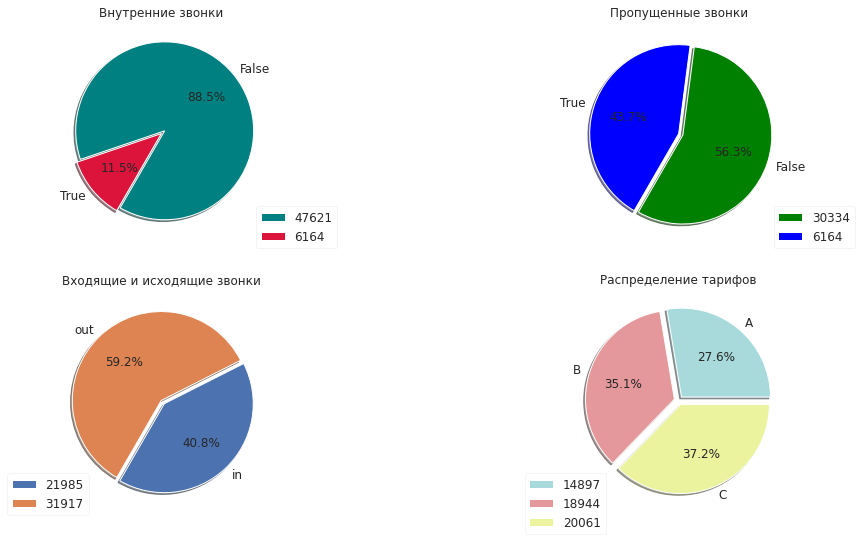

In [210]:
# Визуализация звонков и тарифа

# Внутренние звонки между операторами
plt.figure(figsize = (17, 9))
plt.subplot(2,2,1) # расположение диаграммы на плоскости
explode = (0.05, 0) # массив взрыва (ломтик)
colors = ('teal', 'crimson') # цвета
axes = df.groupby('internal')['internal'].count().plot(
    kind = 'pie',
    colors = colors, # измененние цвета
    fontsize = 12, # размер текста
    shadow = True, # тень
    autopct = '%1.1f%%', # отображение процентов
    explode = explode, # ломтик
    figsize = (15, 5), # размер диаграммы
    startangle = 240, # поворот диаграммы
    subplots = True
)
plt.title('Внутренние звонки', fontsize = 12) # заголовок

var_1 = round(df.query('internal == False')['internal'].count(), 2)
var_2 = round(df.query('internal == True')['internal'].count(), 2)

for ax in axes:
    ax.legend([var_1, var_2], bbox_to_anchor=(0.9,0.2), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')

# Количество пропущенных звонков
plt.subplot(2,2,2)
explode = (0.05, 0)
colors = ('green', 'blue')
axes = df.groupby('is_missed_call')['is_missed_call'].count().plot(
    kind = 'pie',
    colors = colors,
    fontsize = 12,
    shadow = True,
    autopct = '%1.1f%%',
    explode = explode,
    figsize = (15, 5),
    startangle = 240,
    subplots = True
)
plt.title('Пропущенные звонки', fontsize = 12)

var_1 = round(df.query('is_missed_call == False')['is_missed_call'].count(), 2)
Var_2 = round(df.query('is_missed_call == True')['is_missed_call'].count(), 2)

for ax in axes:
    ax.legend([var_1, var_2], bbox_to_anchor=(0.9,0.2), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')
    
# Направление вызовов
plt.subplot(2,2,3)
explode = (0.05, 0)
axes = df.groupby('direction')['direction'].count().plot(
    kind = 'pie',
    fontsize = 12,
    shadow = True,
    autopct = '%1.1f%%',
    explode = explode,
    figsize = (15, 5),
    startangle = 240,
    subplots = True
)
plt.title('Входящие и исходящие звонки', fontsize = 12)

var_1 = round(df.query('direction == "in"')['direction'].count(), 2)
var_2 = round(df.query('direction == "out"')['direction'].count(), 2)

for ax in axes:
    ax.legend([var_1, var_2], bbox_to_anchor=(0.2,0.2), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')
    
# Тарифы
plt.subplot(2,2,4)
explode = (0.05, 0.05, 0.05)
colors = ('#a8dadc', '#e5989b', '#ecf39e')
axes = df.groupby('tariff_plan')['tariff_plan'].count().plot(
    kind = 'pie',
    colors = colors,
    fontsize = 12,
    shadow = True,
    autopct = '%1.1f%%',
    explode = explode,
    figsize = (15, 5),
    startangle = 0,
    subplots = True
)
plt.title('Распределение тарифов', fontsize = 12)

var_1 = round(df.query('tariff_plan == "A"')['tariff_plan'].count(), 2)
var_2 = round(df.query('tariff_plan == "B"')['tariff_plan'].count(), 2)
var_3 = round(df.query('tariff_plan == "C"')['tariff_plan'].count(), 2)

for ax in axes:
    ax.legend([var_1, var_2, var_3], bbox_to_anchor=(0.2,0.2), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')
plt.show()

In [211]:
# Посчитаем количество пустых строк в столбце внутренних звонков
cnt_raw = df.internal.count()
na_raw = df.internal.isna().sum()
per_raw = round(na_raw*100/cnt_raw, 2)
print('Количество строк в столбце internal:', cnt_raw)
print('Количество пустых строк в столбце internal:', na_raw, '-', per_raw, '%')

Количество строк в столбце internal: 53785
Количество пустых строк в столбце internal: 117 - 0.22 %


In [212]:
# Посчитаем количество пустых строк в столбце operator_id
cnt_raw = df.operator_id.count()
na_raw = df.operator_id.isna().sum()
per_raw = round(na_raw*100/cnt_raw, 2)
print('Количество строк в столбце operator_id:', cnt_raw)
print('Количество пустых строк в столбце operator_id:', na_raw, '-', per_raw, '%')

Количество строк в столбце operator_id: 45730
Количество пустых строк в столбце operator_id: 8172 - 17.87 %


<b>Вывод:</b><br>
* Данные о звонках предоставлены за период с  2019-08-02 по 2019-11-28
* Больше всего исходящих звонков - 31917
* Внутренних звонков между операторами 6164
* Практически половина звонков пропущенных (43.7%) - 23568
* Почти равное значение имеют тарифы B(35.1% - 18944) и C(37.2% - 20061)

<b>Необходимо откорректировать:</b>
* В каждом столбце откорректировать типы данных:
    * `date` - datatime64
    * `internal` - bool
    * `operator_id` - int64
    * `date_start` - datatime64
* Предоставлен датасет из <i>53902</i> строк, пустые значения имеют столбцы `internal` (117), `operator_id` (8172)
* Имеются дубликаты строк (4900)

<i>Примечание:</i> Отсутствующей информации по внутренним звонкам меньше <b>1%</b> считаю, что их можно не брать в расчет.<br>
Также отсутствует информация по идентификаторам операторов <b>17.87%</b> - это большая доля датасета. Удалять данные не будем, а восстановим случайными числами. Знать за каким оператором закреплена информация мы не будем, но зато необходимую информацию для анализа сохраним.<br>

<b>Все же стоит проинформировать заказчика про недостающую информацию.</b>

<a name = "1.2."></a><font size = "3"><b>1.2 Предобработка данных</b></font><br/>
<font size = "2">[содержание](#0.0)</font>

<a name = "1.2.1."></a><font size = "3"><b>1.2.1 Корректировка пустых строк и удаление дубликатов</b></font><br/>
<font size = "2">[содержание](#0.0)</font>

In [213]:
# Удаление дубликатов в датафрейме
df = df.drop_duplicates()

# Удаление пропусков в столбце internal & operator_id
print('Количество значений nan до удаления `internal`:', df.internal.isna().sum())
print('Количество значений nan до восстановления `operator_id`:', df.operator_id.isna().sum())
df.dropna(subset = ['internal'], inplace = True)
# восстановим пустые значения случайными числами
df['operator_id'] = df.apply(lambda x: random.choice([x for x in range(958000, 993357)]) if pd.isna(x['operator_id']) else x['operator_id'], axis = 1)
df = df.reset_index(drop = True)
print('Количество значений nan `internal`:', df.internal.isna().sum())
print('Количество значений nan `operator_id`:', df.operator_id.isna().sum())

Количество значений nan до удаления `internal`: 110
Количество значений nan до восстановления `operator_id`: 7456
Количество значений nan `internal`: 0
Количество значений nan `operator_id`: 0


<b>Вывод:</b>
Так как мы сначало удалили дубликаты, поэтому значений в `internal` & `operator_id` стало меньше.<br>
Удаление и восстановление прошло успешно.

<a name = "1.2.2."></a><font size = "3"><b>1.2.2 Преобразование типов данных</b></font><br/>
<font size = "2">[содержание](#0.0)</font>

In [214]:
# Корректировка времени
date_column = ['date', 'date_start']
for column in date_column:
    df[column] = pd.to_datetime(df[column], format = '%Y.%m.%d')

# Корректировка булевых значений и целых чисел
df['internal'] = df['internal'].astype('bool')
df['operator_id'] = df['operator_id'].astype('int64')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48892 entries, 0 to 48891
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              48892 non-null  int64                                
 1   date                 48892 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            48892 non-null  object                               
 3   internal             48892 non-null  bool                                 
 4   operator_id          48892 non-null  int64                                
 5   is_missed_call       48892 non-null  bool                                 
 6   calls_count          48892 non-null  int64                                
 7   call_duration        48892 non-null  int64                                
 8   total_call_duration  48892 non-null  int64                                
 9   tariff

None

<a name = "1.2.3."></a><font size = "3"><b>1.2.3 Определение единицы измерения длительности звонков. Выделить в отдельные столбецы время ожидания, среднюю длительность звонков и среднюю длительность времени ожидания</b></font><br/>
<font size = "2">[содержание](#0.0)</font>

Часовые нормы работы в Колл-центрах: <b>8 (28800 сек), 10 (36000 сек), 12 (43200 сек)</b> часов в день<br>
Возьмем стандартные пятидневные рабочие недели: <b>40 (144000 сек), 50 (180000 сек), 60 (216000 сек)</b> часов в неделю,<br>
а это: <b>160 (576000 сек), 200 (720000 сек), 240 (864000 сек)</b> часов в месяц.<br>

Добавим необходимые столбецы и построим графики `Количества пропущенных звонков`, `Длительности звонков`, `Длительности звонков(с учетом времени ожидания)`, `Время ожидания`, `Средняя длительность звонков`, `Средння длительность времени ожидания`.

In [215]:
# Добавим столбец времени ожидания
df['wait_time'] = df.total_call_duration - df.call_duration # общее время ожидания
df['avg_wait_time'] = round(df.wait_time / df.calls_count, 2) # среднее время ожидания на звонок
df['avg_call_duration'] = round(df.call_duration / df.calls_count, 2) # средняя длительность разговора на звонок
display(df[['user_id', 'date', 'operator_id', 'calls_count', 'call_duration', 'avg_call_duration', 'wait_time', 'avg_wait_time']].head())

,user_id,date,operator_id,calls_count,call_duration,avg_call_duration,wait_time,avg_wait_time
0,166377,2019-08-04 00:00:00+03:00,967296,2,0,0.0,4,2.00
1,166377,2019-08-05 00:00:00+03:00,880022,3,0,0.0,5,1.67
2,166377,2019-08-05 00:00:00+03:00,880020,1,0,0.0,1,1.00
3,166377,2019-08-05 00:00:00+03:00,880020,1,10,10.0,8,8.00
4,166377,2019-08-05 00:00:00+03:00,880022,3,0,0.0,25,8.33


In [216]:
#Обозначим функцию для построения графиков

#Определим словарь
pars = {
    'calls_count': 'Количество звонков',
    'call_duration': 'Длительность звонков',
    'total_call_duration':'Длительность звонков(с учетом времени ожидания)',
    'wait_time': 'Время ожидания',
    'avg_wait_time': 'Средняя длительность времени ожидания',
    'avg_call_duration': 'Средняя длительность звонков'
}

def dis_calls(data, column): # функция с входящими данными
    for a, b in pars.items(): # цикл с забором информации из словаря
        display(data[a].describe()) # вывод статистических данных каждого столбца
        plt.figure(figsize = (12, 5)) # размер фигуры
        data[a].plot(kind = 'hist', bins = 50) # построение гистограммы
        plt.minorticks_on()
        plt.grid(which = 'major')
        plt.grid(which = 'minor', linestyle = ':')
        plt.ylabel('количество')
        plt.xlabel(b)
        plt.title(b)
        plt.show()

count    48892.000000
mean        16.495214
std         63.671633
min          1.000000
25%          1.000000
50%          4.000000
75%         12.000000
max       4817.000000
Name: calls_count, dtype: float64

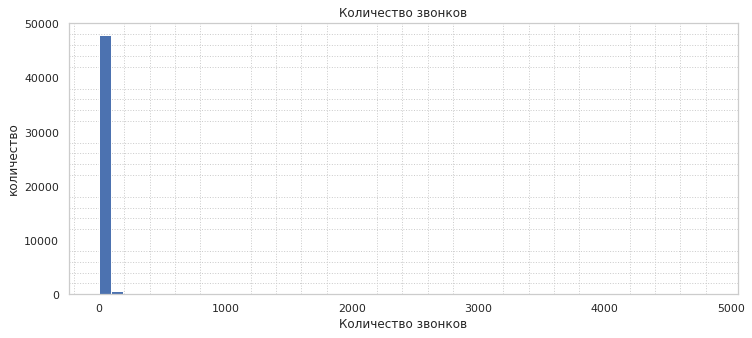

count     48892.000000
mean        868.088788
std        3779.549967
min           0.000000
25%           0.000000
50%          37.000000
75%         573.000000
max      144395.000000
Name: call_duration, dtype: float64

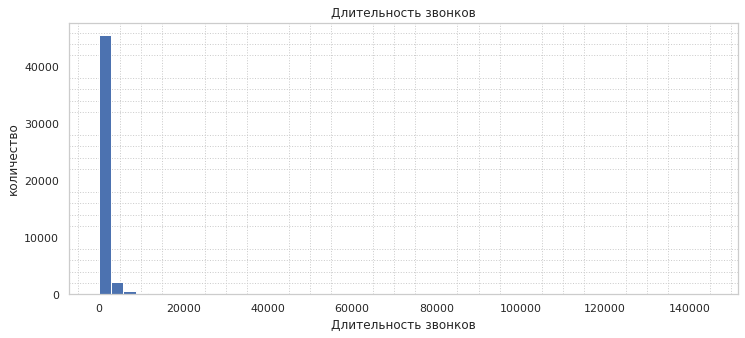

count     48892.000000
mean       1158.976458
std        4456.180933
min           0.000000
25%          46.000000
50%         210.000000
75%         902.000000
max      166155.000000
Name: total_call_duration, dtype: float64

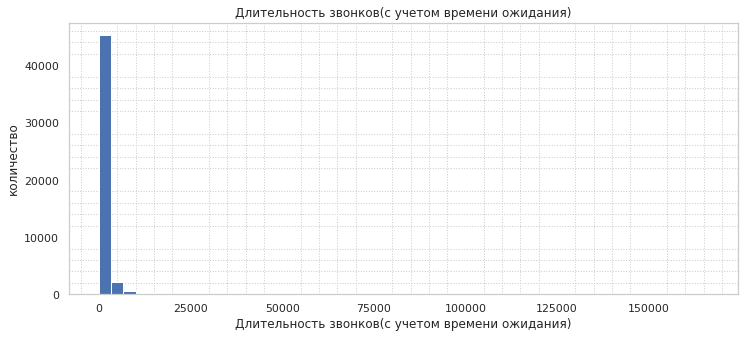

count    48892.000000
mean       290.887671
std       1133.354018
min          0.000000
25%         17.000000
50%         55.000000
75%        200.000000
max      46474.000000
Name: wait_time, dtype: float64

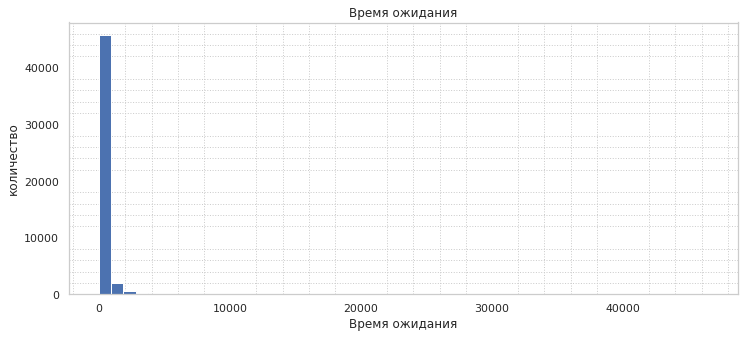

count    48892.000000
mean        16.834191
std         13.873696
min          0.000000
25%          8.000000
50%         14.520000
75%         22.250000
max        465.000000
Name: avg_wait_time, dtype: float64

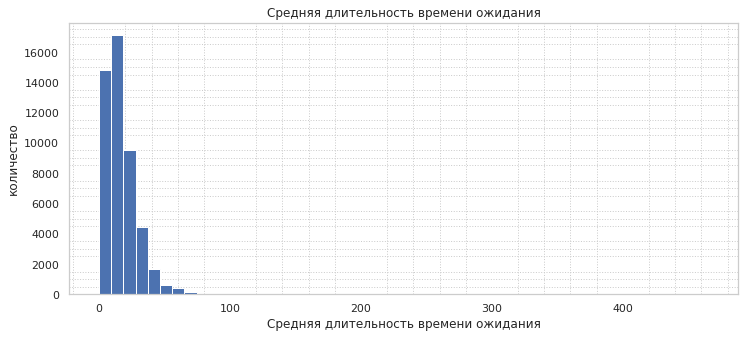

count    48892.000000
mean        66.562100
std        125.214388
min          0.000000
25%          0.000000
50%         23.775000
75%         90.000000
max       3550.000000
Name: avg_call_duration, dtype: float64

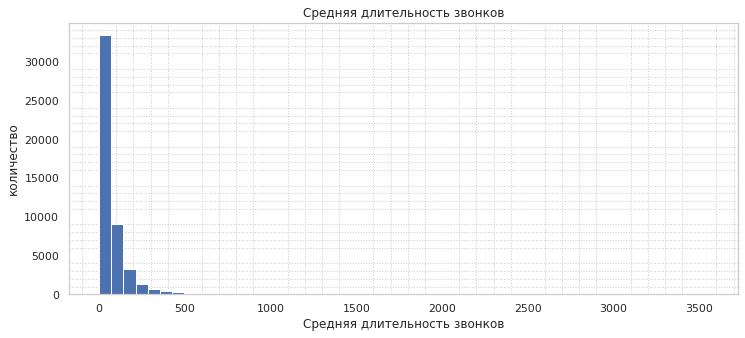

In [217]:
dis_calls(df, pars) # воспроизведение функции

<b>Вывод:</b>

* <b>по Количеству звонков:</b>
    * медиана равна 4
    * максимальное значение 4817
* <b>по Длительности звонков:</b>
    * медиана 37
    * максимальное значение 144395 (2406.6 мин.)
* <b>по Длительности звонков(с учетом времени ожидания):</b>
    * медиана 210
    * максимальное значение 166155 (2769.3 мин.)
* <b>по Времени ожидания:</b>
    * медиана 55
    * максимальное значение 46474 (774.6 мин.)
* <b>Средняя длительность времени ожидания:</b>
    * в среднем на ожидание ответа приходится 14.5 сек.
    * максимум 465 сек.
* <b>Средняя длительность звонков:</b>
    * в среднем на разговор приходится 23.7 сек.
    * максимум 3550 сек.

Обратим внимание на максимальные значения на графиках `Длительности звонков` и взяв во внимание часовые нормы работы операторов, сделаем заключение, что расчетные единицы `Длительности звонков` - <b>секунды</b>.

Заметим, что во всех показателях максимальное значение завышено.<br>
Для более точного анализа необходимо посмотреть выбросы данных и почистить от неадекватно больших значений.

<a name = "1.2.4."></a><font size = "3"><b>1.2.4 Определение зависимости столбцов: direction, internal, is_missed_call и определение количества внутренних звонков между операторами</b></font><br/>
<font size = "2">[содержание](#0.0)</font>

- `user_id` — Идентификатор клиентского аккаунта колл-центра в сервисе
- `operator_id` — Идентификатор оператора
- `direction` — Направление вызовов (out - исходящий вызов, in — входящий вызов)
- `internal` — Является ли звонок внутренним звонком между операторами клиента
- `is_missed_call` — Является ли звонок пропущенным
- `calls_count` — Количество звонков

In [218]:
df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,wait_time,avg_wait_time,avg_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,967296,True,2,0,4,B,2019-08-01,4,2.00,0.0
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,B,2019-08-01,5,1.67,0.0
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,B,2019-08-01,1,1.00,0.0
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,B,2019-08-01,8,8.00,10.0
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,B,2019-08-01,25,8.33,0.0


In [219]:
# Функция по добавлению категорий звонков
def type_c(df):
    if df['direction'] == 'out' and df['internal'] == True and df['is_missed_call'] == True:
        df['type_calls'] = 'Исх. внутр. проп.'
    elif df['direction'] == 'in' and df['internal'] == True and df['is_missed_call'] == True:
        df['type_calls'] = 'Вх. внутр. проп.'
        
    if df['direction'] == 'out' and df['internal'] == True and df['is_missed_call'] == False:
        df['type_calls'] = 'Исх. внутр.  непроп.'
    elif df['direction'] == 'in' and df['internal'] == True and df['is_missed_call'] == False:
        df['type_calls'] = 'Вх. внутр. непроп.'
    
    if df['direction'] == 'out' and df['internal'] == False and df['is_missed_call'] == True:
        df['type_calls'] = 'Исх. внеш. проп.'
    elif df['direction'] == 'in' and df['internal'] == False and df['is_missed_call'] == True:
        df['type_calls'] = 'Вх. внеш. проп.'
    
    if df['direction'] == 'out' and df['internal'] == False and df['is_missed_call'] == False:
        df['type_calls'] = 'Исх. внеш. непроп.'
    elif df['direction'] == 'in' and df['internal'] == False and df['is_missed_call'] == False:
        df['type_calls'] = 'Вх. внеш. непроп.'  
    return df

df = df.apply(type_c, axis = 1)
display(df[['direction', 'internal', 'is_missed_call', 'calls_count', 'type_calls']])

,direction,internal,is_missed_call,calls_count,type_calls
0,in,False,True,2,Вх. внеш. проп.
1,out,True,True,3,Исх. внутр. проп.
2,out,True,True,1,Исх. внутр. проп.
3,out,True,False,1,Исх. внутр. непроп.
4,out,False,True,3,Исх. внеш. проп.
...,...,...,...,...,...
48887,out,True,False,1,Исх. внутр. непроп.
48888,out,True,True,1,Исх. внутр. проп.
48889,out,True,False,2,Исх. внутр. непроп.
48890,out,True,False,4,Исх. внутр. непроп.


In [220]:
# Посмотрим есть ли не присвоенные категории
df_nan = df['type_calls'].isna().sum()
print('Количество пустых строк столбца type_calls:', df_nan)

Количество пустых строк столбца type_calls: 0


In [221]:
# Выведем количество категорий
df_cnt = df.groupby('type_calls').agg({'calls_count':'count'}).rename(columns ={'calls_count':'cnt'}).sort_values(by = ['cnt']).reset_index()
df_cnt['percent'] = round((df_cnt.cnt / df_cnt.cnt.sum()) * 100, 2)
df_cnt

,type_calls,cnt,percent
0,Вх. внутр. проп.,300,0.61
1,Вх. внутр. непроп.,371,0.76
2,Исх. внутр. проп.,2422,4.95
3,Исх. внутр. непроп.,2560,5.24
4,Вх. внеш. проп.,7533,15.41
5,Исх. внеш. проп.,11142,22.79
6,Вх. внеш. непроп.,11691,23.91
7,Исх. внеш. непроп.,12873,26.33


In [222]:
# Сгруппируем категории в датасеты
dep_in_t = df_cnt.query('index == [0, 1]') # входящие внутренние звонки
dep_in_f = df_cnt.query('index == [2, 6]') # входящие внешние звонки

dep_out_t = df_cnt.query('index == [3, 4]') # исходящие внутренние звонки
dep_out_f = df_cnt.query('index == [5, 7]') # исходящие внешние звонки

pars_1 = {
    'dep_in_t': 'Входящие внутренние звонки'   
}

pars_2 = {
    'dep_in_f': 'Входящие внешние звонки'
}

pars_3 = {
    'dep_out_t': 'Исходящие внутренние звонки'
}

pars_4 = {
    'dep_out_f': 'Исходящие внешние звонки'
}
def type_calls(data, pars): # функция с входящими данными
    for a, b in pars.items():
        #plt.figure(figsize = (17, 8)) # размер фигуры
        data.plot(x = 'type_calls', y = 'cnt', kind = 'barh', figsize = (10, 5)) # построение гистограммы
        plt.minorticks_on()
        plt.grid(which = 'major')
        plt.grid(which = 'minor', linestyle = ':')
        plt.xlabel('Количество звонков', fontsize = 10)
        plt.title(b, fontsize = 12)
        plt.show()

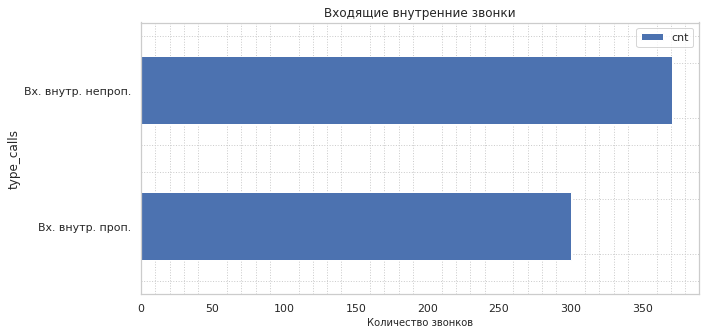

In [223]:
type_calls(dep_in_t, pars_1)

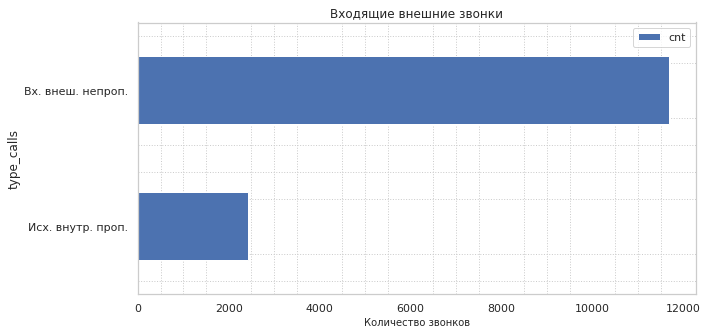

In [224]:
type_calls(dep_in_f, pars_2)

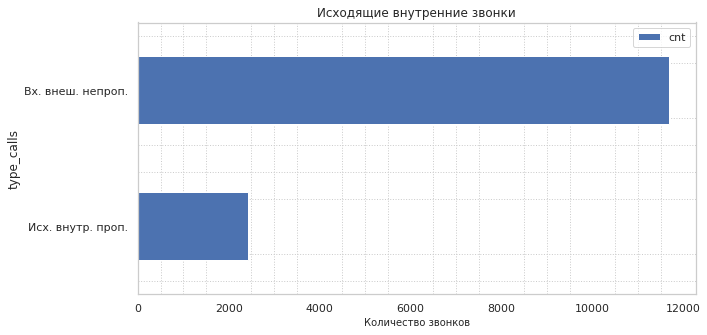

In [225]:
type_calls(dep_in_f, pars_3)

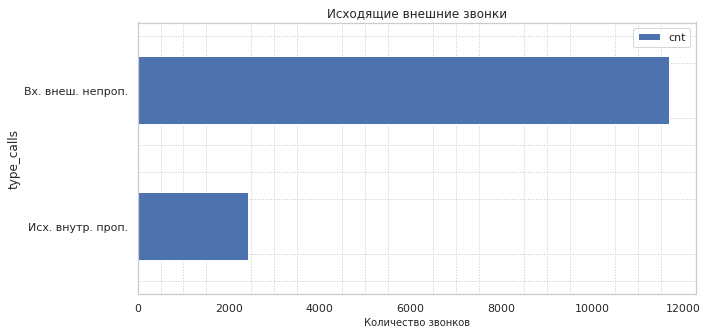

In [226]:
type_calls(dep_in_f, pars_4)

In [227]:
# Функция по объединению в категории пропущенных и длительности звонков 
def typ(df):
    if df['is_missed_call'] == True and df['call_duration'] == 0:
        df['type_miss_calls'] = 'Проп. без уч. длит.'
    elif df['is_missed_call'] == True and df['call_duration'] != 0:
        df['type_miss_calls'] = 'Проп. с уч. длит.'
        
    if df['is_missed_call'] == True and df['call_duration'] == 0:
        df['type_miss_calls'] = 'Проп. без уч. длит.'
    elif df['is_missed_call'] == True and df['call_duration'] != 0:
        df['type_miss_calls'] = 'Проп. с уч. длит.'
        
    if df['is_missed_call'] == False and df['call_duration'] == 0:
        df['type_miss_calls'] = 'Непроп. без уч. длит.'
    elif df['is_missed_call'] == False and df['call_duration'] != 0:
        df['type_miss_calls'] = 'Непроп. с уч. длит.'
        
    if df['is_missed_call'] == False and df['call_duration'] == 0:
        df['type_miss_calls'] = 'Непроп. без уч. длит.'
    elif df['is_missed_call'] == False and df['call_duration'] != 0:
        df['type_miss_calls'] = 'Непроп. с уч. длит.'
    return df

df = df.apply(typ, axis = 1)
display(df[['is_missed_call', 'calls_count', 'call_duration', 'type_miss_calls']].head())

# Посмотрим есть ли не присвоенные категории
df_nan = df[df['type_miss_calls'].isna()]
print('Количество пустых строк столбца type_calls:', df_nan.type_miss_calls.sum())
df_call_miss = df.groupby('type_miss_calls').agg({'calls_count':'count'}).rename(columns = {'calls_count':'cnt'}).sort_values(by = 'cnt').reset_index()
display(df_call_miss)

,is_missed_call,calls_count,call_duration,type_miss_calls
0,True,2,0,Проп. без уч. длит.
1,True,3,0,Проп. без уч. длит.
2,True,1,0,Проп. без уч. длит.
3,False,1,10,Непроп. с уч. длит.
4,True,3,0,Проп. без уч. длит.


Количество пустых строк столбца type_calls: 0


,type_miss_calls,cnt
0,Непроп. без уч. длит.,17
1,Проп. с уч. длит.,295
2,Проп. без уч. длит.,21102
3,Непроп. с уч. длит.,27478


,type_miss_call_all,cnt,percent
0,Исх. внеш. непроп. Непроп. без уч. длит.,6,0.01
1,Исх. внутр. непроп. Непроп. без уч. длит.,11,0.02
2,Вх. внутр. проп. Проп. с уч. длит.,13,0.03
3,Исх. внутр. проп. Проп. с уч. длит.,21,0.04
4,Вх. внеш. проп. Проп. с уч. длит.,261,0.53
5,Вх. внутр. проп. Проп. без уч. длит.,287,0.59
6,Вх. внутр. непроп. Непроп. с уч. длит.,371,0.76
7,Исх. внутр. проп. Проп. без уч. длит.,2401,4.91
8,Исх. внутр. непроп. Непроп. с уч. длит.,2549,5.21
9,Вх. внеш. проп. Проп. без уч. длит.,7272,14.87


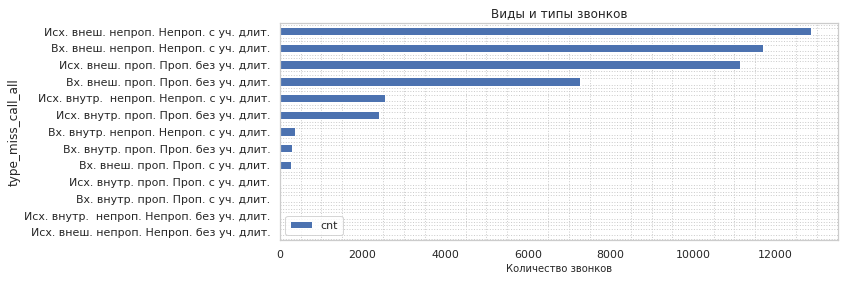

In [228]:
# Выведем количество категорий и визуализируем
df_miss = df.groupby(['type_calls', 'type_miss_calls']).agg({'calls_count':'count'}).rename(columns = {'calls_count':'cnt'}).sort_values(by = 'cnt').reset_index()
df_miss['type_miss_call_all'] = df_miss.type_calls + ' ' + df_miss.type_miss_calls
df_miss = df_miss[['type_miss_call_all', 'cnt']]
df_miss['percent'] = round((df_miss.cnt / df_miss.cnt.sum()) * 100, 2)
display(df_miss)

df_miss.plot(x = 'type_miss_call_all', y = 'cnt', kind = 'barh', figsize = (10, 4))
plt.minorticks_on()
plt.grid(which = 'major')
plt.grid(which = 'minor', linestyle = ':')
plt.xlabel('Количество звонков', fontsize = 10)
plt.title('Виды и типы звонков', fontsize = 12)
plt.show()


<b>Вывод:</b>

* В датафрейме осталлось <b>48892</b> строки
* Удалены дубликаты строк <b>4900</b>
* Удалены пустые строки столбца `internal` - <b>110</b>
* Восстановлены строки в столбце `operator_id` - <b>7456</b>
* Откорректированы типы данных `date`, `date_start`, `internal`, `operator_id`

Меньше всего Входящих внутренних звонков <b>(671: 1.38%)</b> и затем идут Исходящие внутренние звонки <b>(4982: 10.18%)</b>
Естественно основной частью являются исходящие <b>(24015: 49.12%)</b> и входящие <b>(19224: 39.31%)</b> внешние звонки.

Обратим внимание на пропущенные звонки и их длительность. Имеются `Непропущенные` звонки `без` пометки о `Длительности` разговора и `Пропущенные` звонки с пометкой о `Длительности` разговора. Всего замечено <b>312</b> строк.

Возможно неверно были выгружены данные изначально и возможно `Пропущенные` и `Непропущенные` были перепутаны и их можно восстановить, но т.к. их не так много, поэтому просто отчистим датасет от неверных строк.

<a name = '2.'></a><font size = '4'><b>2. Проведение исследовательского анализа данных</b></font><br>
<font size = '2'>[Содержание](#0.0)</font>

<a name = "2.1."></a><font size = "3"><b>2.1 Посмотрим и отфильтруем данные по количеству звонков, длительности звонков, длительности звонков с ожиданием и отчистим от некорректных данных</b></font><br/>
<font size = "2">[содержание](#0.0)</font>

In [229]:
print('Количество строк датасета:', df.user_id.count())

# Уберем из датасета некорректные данные
df = df.query("type_miss_calls != 'Непроп. без уч. длит.' & type_miss_calls != 'Проп. с уч. длит.'")
print('Количество строк датасета после корректировки:', df.user_id.count())

Количество строк датасета: 48892
Количество строк датасета после корректировки: 48580


In [230]:
# Построим коробчатую диаграмму для определения выбросов

def box_call(data, column):
    for a, b in column.items():
        sns.set_theme(style = 'whitegrid')
        plt.figure(figsize = (20, 4))
        sns.boxplot(data = data, x = a, palette = 'Set3')
        plt.minorticks_on()
        plt.grid(which='minor', linestyle=':')
        plt.title(b, fontsize = 15)
        plt.xlabel('Количество')
        plt.show()

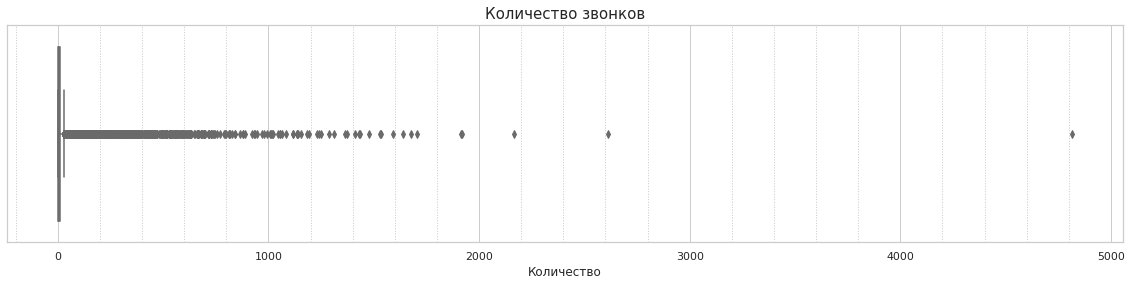

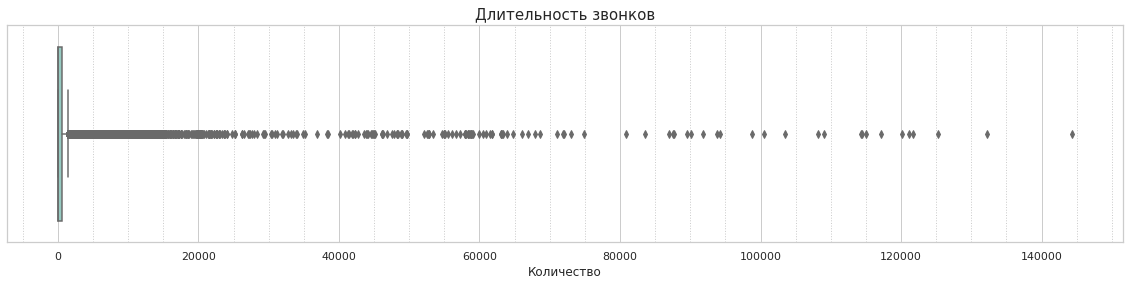

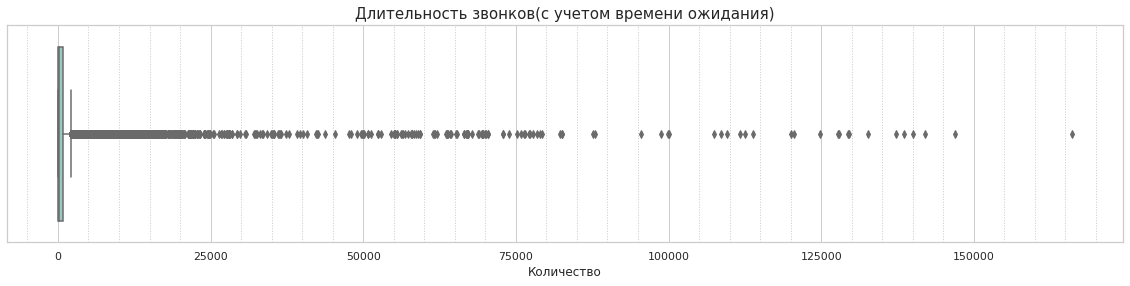

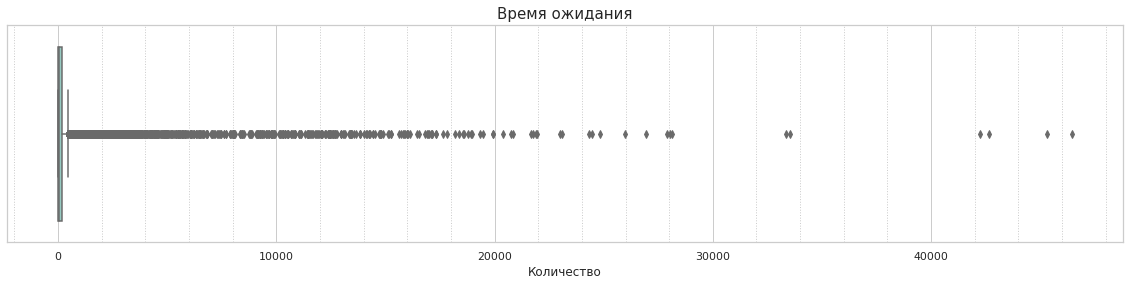

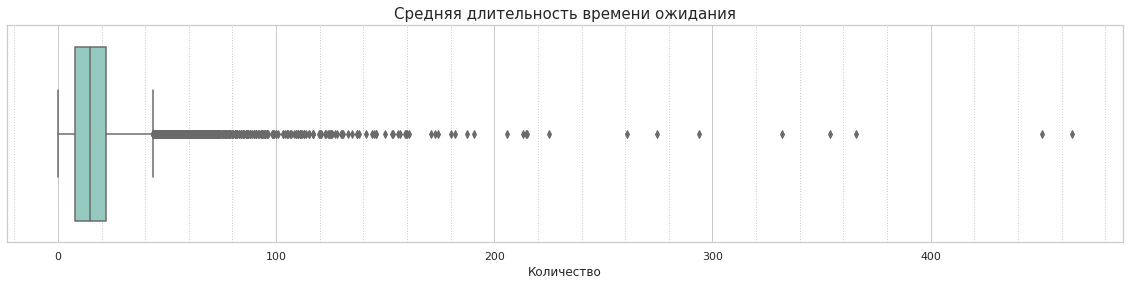

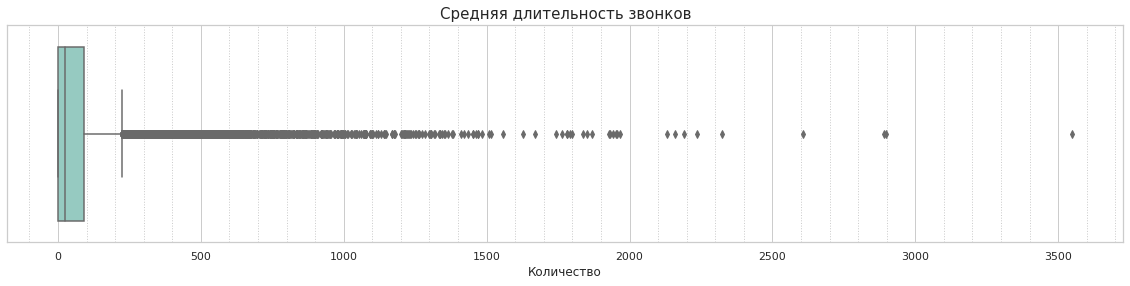

In [231]:
box_call(df, pars)

Из графиков видно наличие аномальнных чисел, используем процентиль 95% для отсечения 5% от всех данных.

In [232]:
# Определение процентиль 95%

def quan_call(data, column):
    for a, b in column.items():
        data = data[data[a] <= data[a].quantile(q = 0.95)]
    return data

In [233]:
# Отфильтрованный датафрейм
df = quan_call(df, pars)

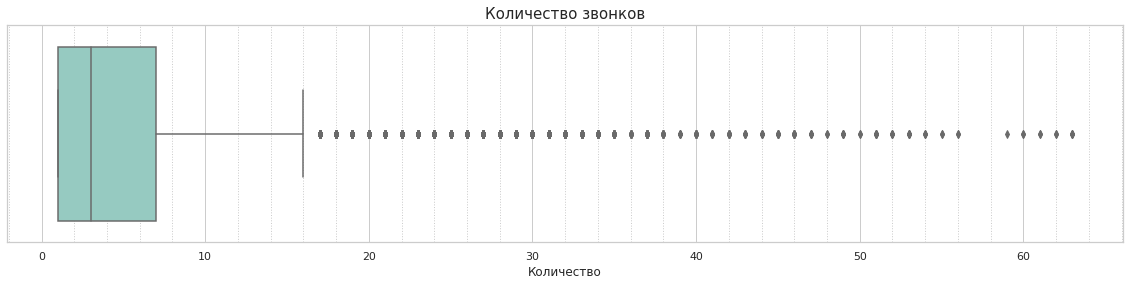

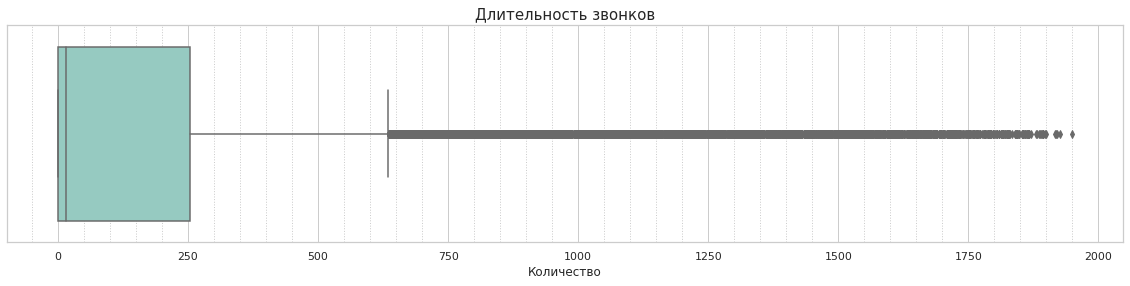

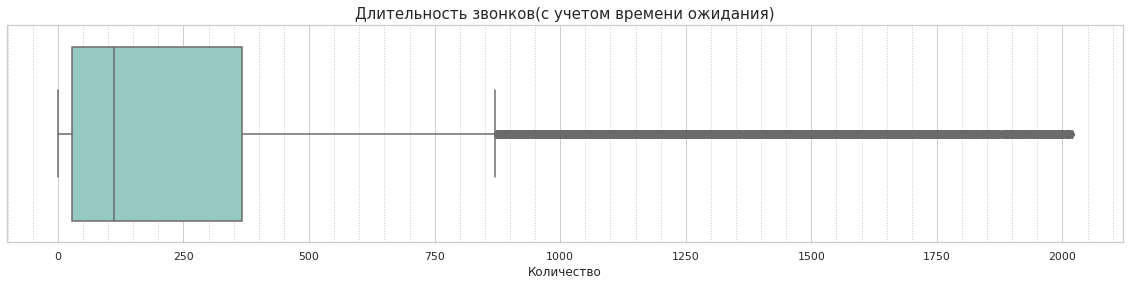

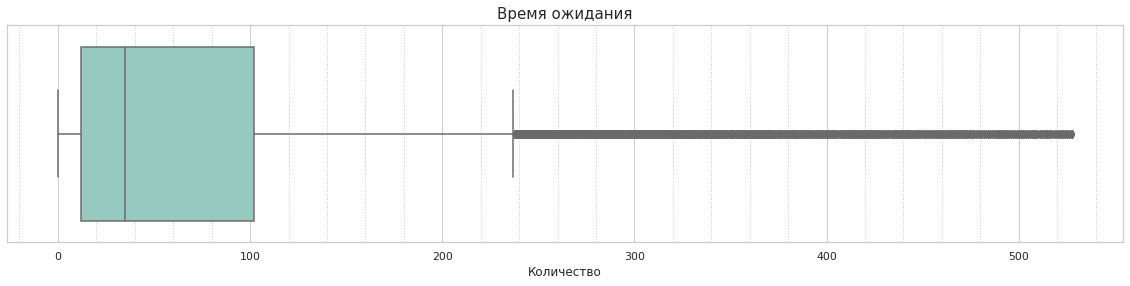

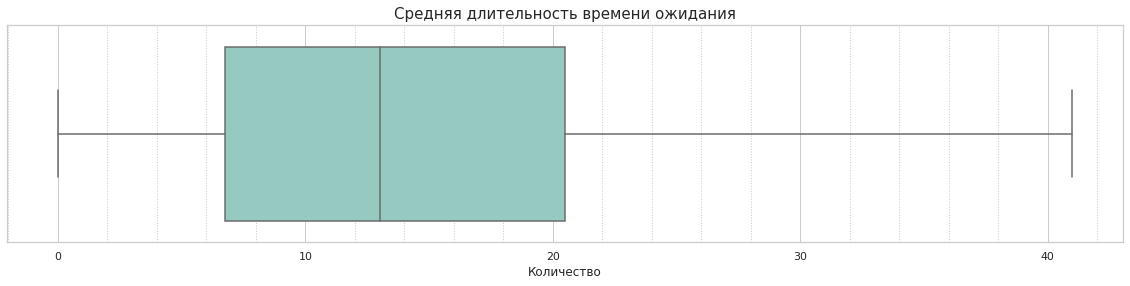

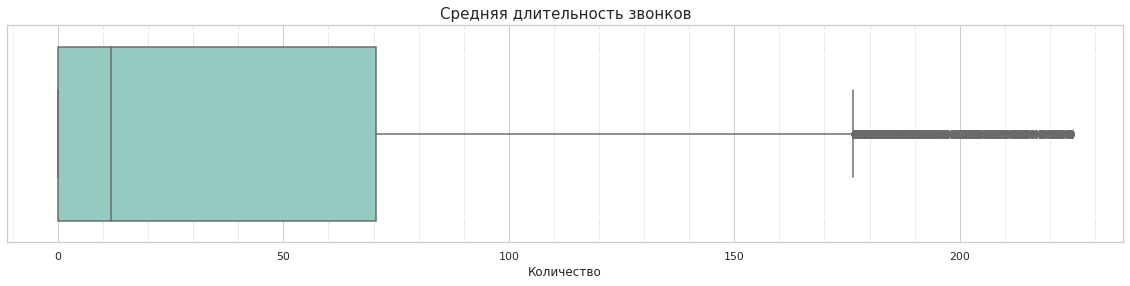

In [234]:
# Посмотрим на откорректированные данные
box_call(df, pars)

count    35779.000000
mean         5.339976
std          6.253774
min          1.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         63.000000
Name: calls_count, dtype: float64

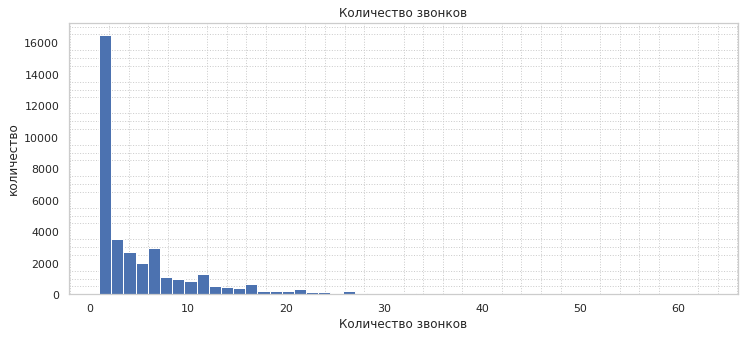

count    35779.000000
mean       216.950949
std        380.930503
min          0.000000
25%          0.000000
50%         15.000000
75%        254.000000
max       1950.000000
Name: call_duration, dtype: float64

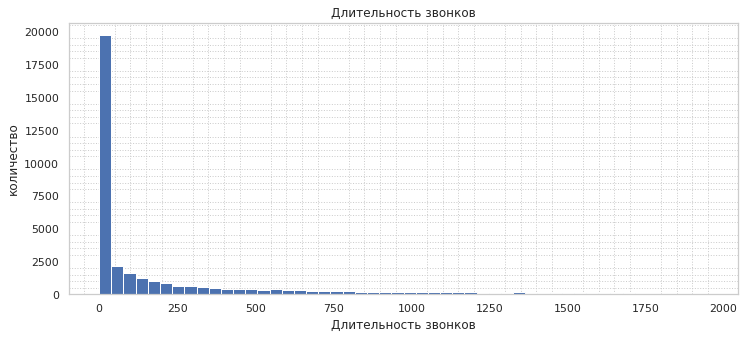

count    35779.000000
mean       296.157495
std        423.536665
min          0.000000
25%         29.000000
50%        112.000000
75%        366.000000
max       2020.000000
Name: total_call_duration, dtype: float64

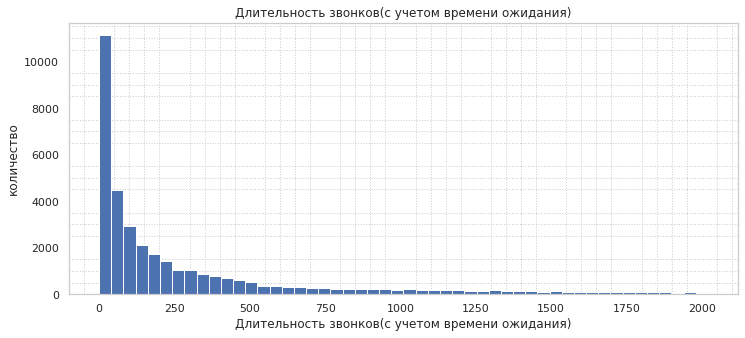

count    35779.000000
mean        79.206546
std        103.859049
min          0.000000
25%         12.000000
50%         35.000000
75%        102.000000
max        528.000000
Name: wait_time, dtype: float64

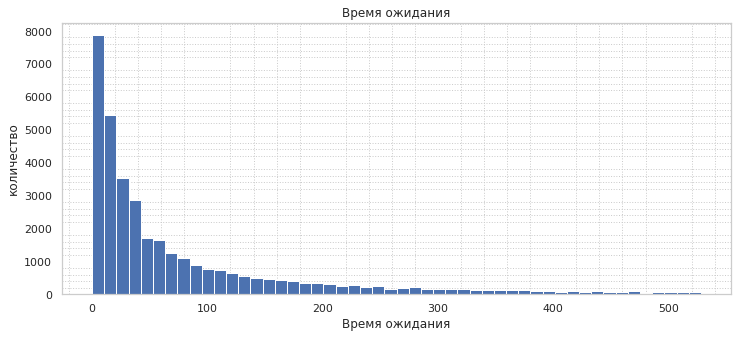

count    35779.000000
mean        14.340475
std          9.817995
min          0.000000
25%          6.750000
50%         13.000000
75%         20.475000
max         41.000000
Name: avg_wait_time, dtype: float64

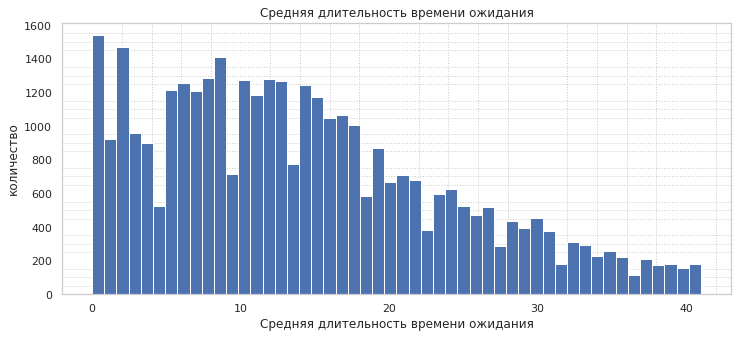

count    35779.000000
mean        40.594807
std         53.523316
min          0.000000
25%          0.000000
50%         11.710000
75%         70.500000
max        225.000000
Name: avg_call_duration, dtype: float64

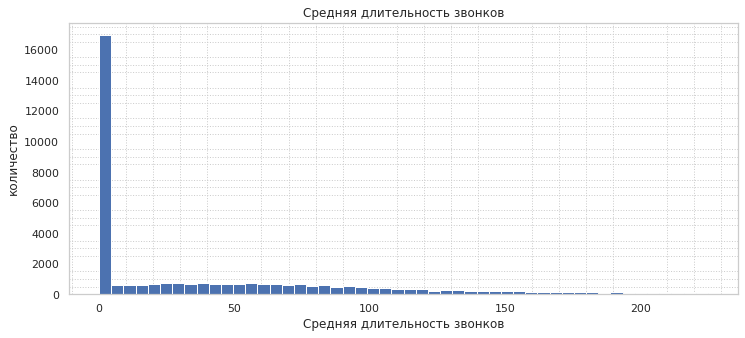

In [235]:
# Функция построения графиков
dis_calls(df, pars)

In [236]:
df = df.reset_index()
df = df.drop(['index'], axis = 1)
display(df.head())
print('Размер датафрейма:', df.user_id.count())

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,wait_time,avg_wait_time,avg_call_duration,type_calls,type_miss_calls
0,166377,2019-08-04 00:00:00+03:00,in,False,967296,True,2,0,4,B,2019-08-01,4,2.00,0.0,Вх. внеш. проп.,Проп. без уч. длит.
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,B,2019-08-01,5,1.67,0.0,Исх. внутр. проп.,Проп. без уч. длит.
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,B,2019-08-01,1,1.00,0.0,Исх. внутр. проп.,Проп. без уч. длит.
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,B,2019-08-01,8,8.00,10.0,Исх. внутр. непроп.,Непроп. с уч. длит.
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,B,2019-08-01,25,8.33,0.0,Исх. внеш. проп.,Проп. без уч. длит.


Размер датафрейма: 35779


<b>Вывод:</b>

В день оператор совершает в среднем до <b>5</b> звонков, длительностью разговора <b>217</b> секунд и временем ожидания <b>79</b> секунд.<br>
В среднем 14 сек приходится на ожидание и 41 сек на длительность разговора.<br>
Датафрайм сократился до <b>35779</b> строк.<br>
Максимальные значения по всем параметрам стали более реальными: количество звонков - <b>63</b>, длительность звонка - <b>1950</b> сек, длительность звонков(с учетом времени ожидания) - <b>2020</b> сек, время ожидания - <b>528</b> сек.<br>

Но и при всем этом, даже если брать максимальные числа и 8 часовой рабочий день получается, а в день совершалось 5 звонков. Можно сделать вывод, что операторы не максимуме своих возможностей.<br>

* Откорректированы типы столбцов
* Добавлены дополнительные столбцы времени ожидания и средних значений
* Удалены дубликаты строк
* Удалены неполные строки
* Восстановлены данные об операторах
* Датафрейм отчищен от аномальных данных.

<a name = "2.2."></a><font size = "3"><b>2.2 Обозначение границ эффективности и визуализация звонков</b></font><br/>
<font size = "2">[содержание](#0.0)</font>

Эффективность операторов определяется:
* Входящие:
    * количеством пропущенных звонков
    * долгим ожиданием ответа
* Исходящие:
    * количеством исходящих звонков
    
Предлягаю выдавать оценку каждому диапазону показателей по каждому признаку. В случае с входящими оценки будем суммировать для получения конечной оценки по двум признакам.<br>
Разделим весь диапазон по квартилям:
* 0 будем присваивать значеям до 25%
* 1 будем присваивать значениям от 25% до 50%
* 2 будем присваивать значениям от 50% до 75%
* 3 будем присваивать значениям от 75%

Неэффективными будем считать операторов, у которых оценка будет <b>больше или равна 1</b><br>
Тем самым мы разделим операторов на рейтинговые группы, по которым Колл-центры смогут видеть производительность каждого оператора. При этом признаки можно добавлять или убирать, а метод оценки останется прежним.

* по входящим пропущенным будем смотреть как на внутренние, так и на внешние звонки
* по ожиданию ответа будем использовать среднее значение на один звонок
* по количеству исходящих звонков, при этом не будем учитывать пропущенные звонки

In [237]:
#построим функция для вывода и визуализации данных по признакам для определения границ

def box_dia(data, a, b):
    print(f'count: {data.count()}')
    print(data.describe())
    sns.set_theme(style = 'whitegrid')
    plt.figure(figsize = (20, 4))
    sns.boxplot(data = data, x = a, palette = 'Set3')
    plt.minorticks_on()
    plt.grid(which='minor', linestyle=':')
    plt.title(b, fontsize = 15)
    plt.show()

In [238]:
df.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start,wait_time,avg_wait_time,avg_call_duration,type_calls,type_miss_calls
0,166377,2019-08-04 00:00:00+03:00,in,False,967296,True,2,0,4,B,2019-08-01,4,2.00,0.0,Вх. внеш. проп.,Проп. без уч. длит.
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,B,2019-08-01,5,1.67,0.0,Исх. внутр. проп.,Проп. без уч. длит.
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,B,2019-08-01,1,1.00,0.0,Исх. внутр. проп.,Проп. без уч. длит.
3,166377,2019-08-05 00:00:00+03:00,out,True,880020,False,1,10,18,B,2019-08-01,8,8.00,10.0,Исх. внутр. непроп.,Непроп. с уч. длит.
4,166377,2019-08-05 00:00:00+03:00,out,False,880022,True,3,0,25,B,2019-08-01,25,8.33,0.0,Исх. внеш. проп.,Проп. без уч. длит.


In [239]:
df_in = df.query("direction == 'in' & is_missed_call == True")['calls_count'] #  отфильтрованные вх. пропущенные звонки
df_wt = df.query("direction == 'in'")['avg_wait_time'] # отфильтрованные вх. по среднему времени ожидания на звонок
df_out = df.query("direction == 'out' & is_missed_call == False")['calls_count'] # отфильтрованные исх. непропущенные

count: 6361
count    6361.000000
mean        4.761044
std         7.036482
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max        63.000000
Name: calls_count, dtype: float64


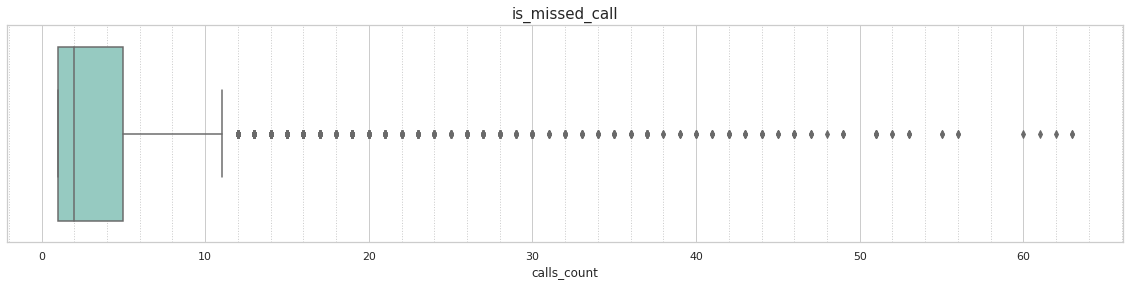

In [240]:
box_dia(df_in, df_in, 'is_missed_call')

count: 15572
count    15572.000000
mean        14.180712
std          9.983954
min          0.000000
25%          6.330000
50%         12.000000
75%         20.670000
max         41.000000
Name: avg_wait_time, dtype: float64


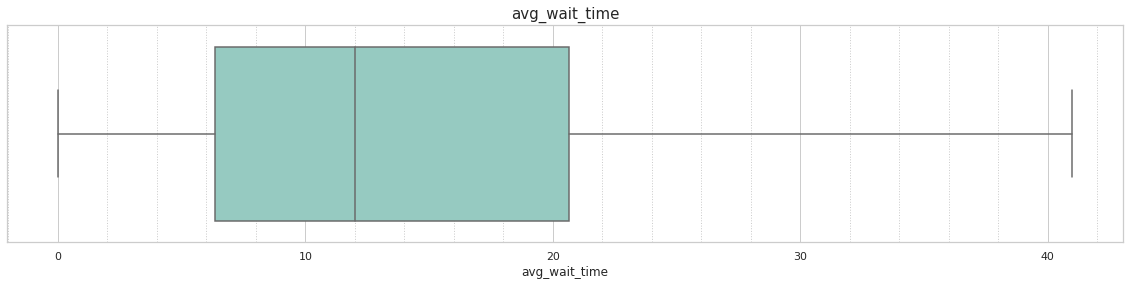

In [241]:
box_dia(df_wt, df_wt, 'avg_wait_time')

count: 9991
count    9991.000000
mean        6.251526
std         6.596150
min         1.000000
25%         2.000000
50%         4.000000
75%         9.000000
max        54.000000
Name: calls_count, dtype: float64


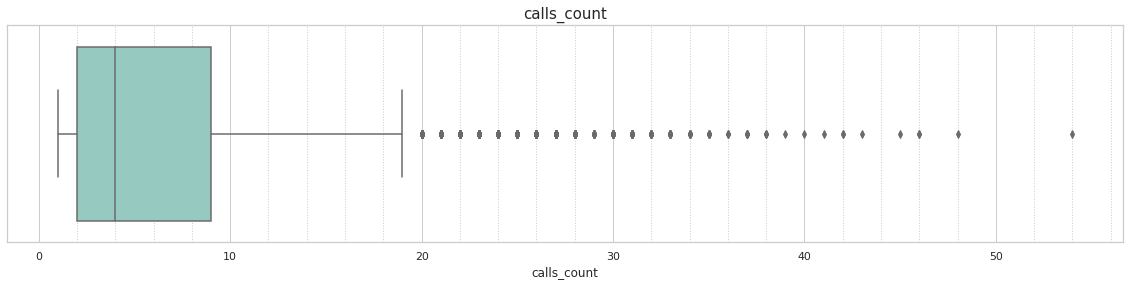

In [242]:
box_dia(df_out, df_out, 'calls_count')

In [243]:
# функции определения оценочных диапазонов и присвоение им оценки, исходящие будут оцениваться как 0
# так как границы квантилей одинаковые, оценка сместилась для входящих пропущенных

# функция для входящих
def sc_sign_in(data, column, sign):
    name_score = [0.5, 0.75, 1]
    data[column] = pd.qcut(sign,
                          q = [0, .25, .5, .75, 1],
                           labels = name_score,
                          duplicates = 'drop')
    data[column] = data[column].astype('float')
    data[column] = data[column].fillna(0)

    
# функция для времени ожидания и исходящих
def sc_sign_wt(data, column, sign):
    name_score = [0.25, 0.5, 0.75, 1]
    data[column] = pd.qcut(sign,
                          q = [0, .25, .5, .75, 1],
                           labels = name_score)
    data[column] = data[column].astype('float')
    data[column] = data[column].fillna(0)
    
    
def sc_sign_out(data, column, sign):
    name_score = [1, 0.75, 0.5, 0.25]
    data[column] = pd.qcut(sign,
                          q = [0, .25, .5, .75, 1],
                           labels = name_score)
    data[column] = data[column].astype('float')
    data[column] = data[column].fillna(0)

In [244]:
sc_sign_in(df, 'in_miss_score', df_in)

In [245]:
sc_sign_wt(df, 'wt_score', df_wt)

In [246]:
sc_sign_out(df, 'out_calls_score', df_out)

In [247]:
# объединим оценки в общую оценку

df['total_score'] = df['in_miss_score'] + df['wt_score'] + df['out_calls_score']
df[['user_id', 'operator_id', 'in_miss_score', 'wt_score', 'out_calls_score', 'total_score']]

,user_id,operator_id,in_miss_score,wt_score,out_calls_score,total_score
0,166377,967296,0.5,0.25,0.00,0.75
1,166377,880022,0.0,0.00,0.00,0.00
2,166377,880020,0.0,0.00,0.00,0.00
3,166377,880020,0.0,0.00,1.00,1.00
4,166377,880022,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...
35774,168606,957922,0.0,0.00,1.00,1.00
35775,168606,963908,1.0,0.75,0.00,1.75
35776,168606,957922,0.0,0.00,0.75,0.75
35777,168606,957922,0.0,0.00,0.00,0.00


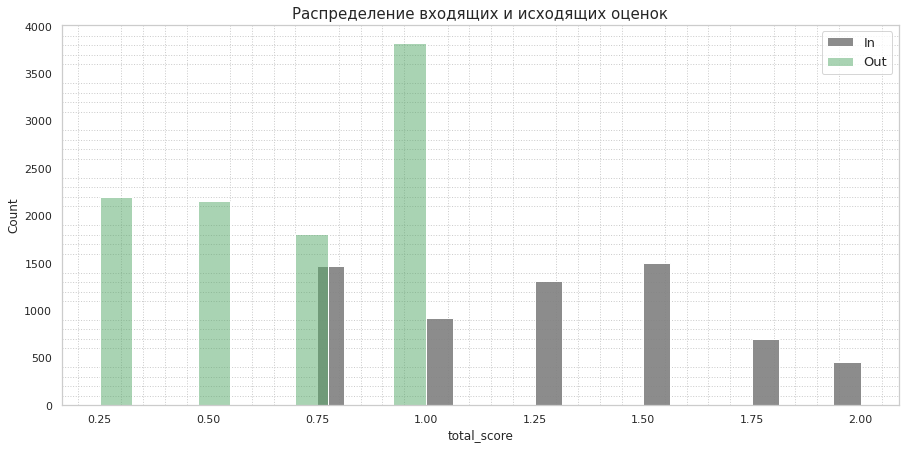

In [248]:
# посмотрим как распределены оценки по входящим и исходящим
s = df.query("direction == 'in' & is_missed_call == True")['total_score']
u = df.query("direction == 'out' & is_missed_call == False")['total_score']

plt.figure(figsize = (15, 7))

ax = sns.histplot(data = s, alpha = .9, bins = 20, color = 'grey')
ax2 =sns.histplot(data = u, alpha = .5,  ax = ax, color = 'g', bins = 10)

plt.minorticks_on()
plt.grid(which = 'major')
plt.grid(which = 'minor', linestyle = ':')
plt.title('Распределение входящих и исходящих оценок', fontsize = 15)

inn = 'In'.format()
out = 'Out'.format()

plt.legend([inn, out], prop={'size':13})
plt.show()

<b>Примечание</b> Больше всего отработанных качественно звонков относится к исходящим. Но сравнивать входящие и исходящие нельзя потому, что к оценке входящих применялись два признака. Входящие имею худшую оценку нежели исходящие.

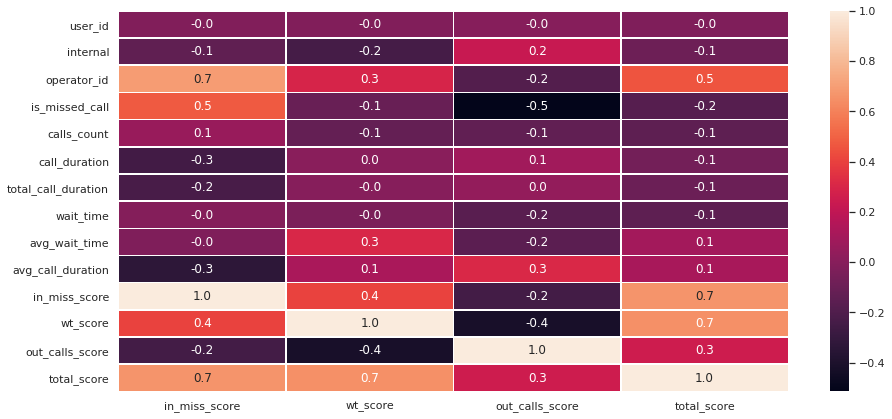

In [249]:
# посмотрим на корреляцию оценок на все значения

plt.figure(figsize = (15, 7))

corr = df.corr()
sns.heatmap(corr[['in_miss_score', 'wt_score', 'out_calls_score', 'total_score']],
            annot = True,
            linewidth=.5,
            fmt=".1f")
plt.show()

<div class="alert alert-warning">
    
**Комментарий ревьюера**

**#можно лучше**

При таком большом наборе столбцов лучше смотреть именно то, что нас интересует. нам же не нужна корреляция времени с идентификатором и.т.п. Фактически только последние тристроки нас интересуют, нагляднее было бы именно их и показать
</div>

<b>Примечание</b><br>
Наблюдается небольшая положительная связь <b>(0.4)</b> времени ожидания с пропущенными входящими, а также исходящих непропущенных звонков с длительностью вызова <b>(0.6)</b>.<br>
Время ожидания связано с входящими звонками, а на тепловой карте не отображаются тарифные планы - посмотрим на распределение тарифов по оценке времени ожидания.

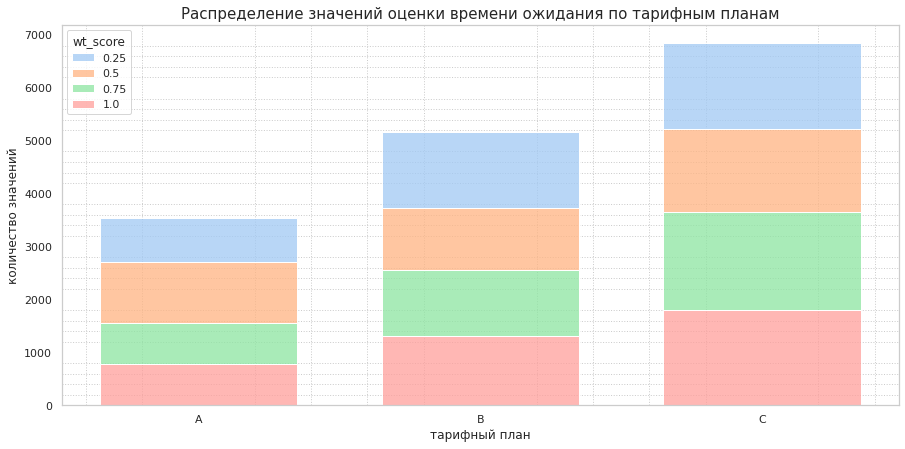

In [250]:
# построим гистограмму по распределению тарифов по оценке времени ожидания
# будем смотреть входящие пропущенные звонки

def hist_tariff(data):
    plt.figure(figsize = (15, 7))

    sns.histplot(data.query('wt_score != 0').sort_values(by = 'tariff_plan', ascending = True), x = 'tariff_plan',
             hue = 'wt_score',
             shrink = 0.7,
             palette = "pastel", 
             multiple = "stack")

    plt.minorticks_on()
    plt.grid(which = 'major')
    plt.grid(which = 'minor', linestyle = ':')

    plt.title("Распределение значений оценки времени ожидания по тарифным планам", fontsize = 15)
    plt.xlabel("тарифный план", fontsize = 12)
    plt.ylabel("количество значений", fontsize = 12)
    plt.show()
    
hist_tariff(df)

<b>Вывод:</b>

Разделили операторов на рейтинговые группы, которые позволяют видеть производительность каждого сотрудника. Также возможно менять признаки для оценки дейтельности сотрудников.<br>
В входящих пропущенных звонках границы квантилей получили одно значение, поэтому оценку пришлось установить отличной от оценки двух других признаков.<br>
В результате получили по исходящим показатели выше, чем по входящим из-за разницы оценки.

Наблюдается небольшая положительная связь <b>(0.4)</b> времени ожидания с пропущенными входящими, а также исходящих непропущенных звонков с длительностью вызова <b>(0.6)</b>.<br>
По распределению по тарифам времени ожидания видно, что тарифы <b>А, B, C</b> имею различия в динамике и это заметно по всем оценкам.<br>

<a name = "2.3."></a><font size = "3"><b>2.3 Определение видов Колл-Центров</b></font><br/>
<font size = "2">[содержание](#0.0)</font>

In [251]:
# разделим колл-центры на те которые занимаюся только обзвоном,
# только входящими вызовами и тех кто специализируется на обоих видах(гибридные)

# построим таблицу колл-центров с количеством операторов по входящим и исходящим

df_cc = df.pivot_table(index = 'user_id',  columns = 'direction', values = 'calls_count', aggfunc = 'sum') \
    .fillna(0).reset_index()

# цикл перевода значений в столбцах в целые числа
per_column = ['in', 'out']
for column in per_column:
    df_cc[column] = df_cc[column].astype('int64')

print('Таблица Колл-центров с количеством операторов по входящим и исходящим')
display(df_cc.head())

Таблица Колл-центров с количеством операторов по входящим и исходящим


direction,user_id,in,out
0,166377,191,2491
1,166391,22,1
2,166392,177,0
3,166399,20,0
4,166405,1990,2299


In [252]:
# построим функция присваивания вида колл-центра

def cc_group(r):
    if r['in'] > 0 and r['out'] == 0:
        return 'in'
    elif r['in'] > 0 and r['out'] > 0:
        return 'in-out'
    elif r['in'] == 0 and r['out'] > 0:
        return 'out'
    else:
        return 'none'

# добавим в отдельный столбец виды колл-центров

df_cc['center_group'] = df_cc.apply(cc_group, axis = 1)
display(df_cc.head())

direction,user_id,in,out,center_group
0,166377,191,2491,in-out
1,166391,22,1,in-out
2,166392,177,0,in
3,166399,20,0,in
4,166405,1990,2299,in-out


In [253]:

# присоединим столбец center_group к основной таблице
df = df.merge(df_cc[['user_id', 'center_group']], how = 'left', on = 'user_id')

# построим таблицу операторов по видам
gr = df.groupby(['center_group', 'operator_id']) \
    .agg({'operator_id':'count'}) \
    .rename(columns = {'operator_id':'cnt'}) \
    .sort_values(by = 'cnt', ascending = False) \
    .reset_index()


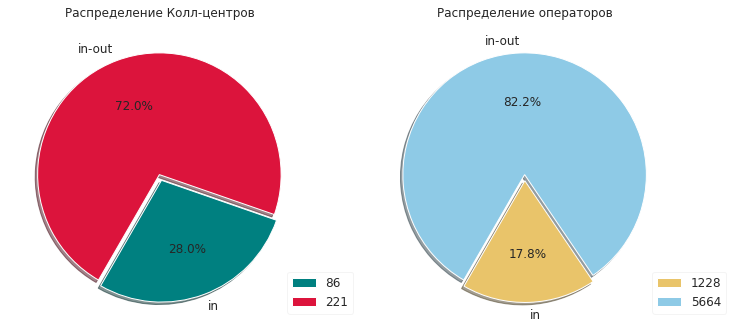

In [254]:

plt.figure(figsize = (12, 7))
plt.subplot(1,2,1) # расположение диаграммы на плоскости
explode = (0.05, 0) # массив взрыва (ломтик)
colors = ('teal', 'crimson') # цвета
axes = df_cc.groupby('center_group')['user_id'].count().plot(
    kind = 'pie',
    colors = colors, # измененние цвета
    fontsize = 12, # размер текста
    shadow = True, # тень
    autopct = '%1.1f%%', # отображение процентов
    explode = explode, # ломтик
    figsize = (15, 5), # размер диаграммы
    startangle = 240, # поворот диаграммы
    subplots = True
)
plt.title('Распределение Колл-центров', fontsize = 12) # заголовок

var_1 = round(df_cc.query('center_group == "in"')['center_group'].count(), 2)
var_2 = round(df_cc.query('center_group == "in-out"')['center_group'].count(), 2)

for ax in axes:
    ax.legend([var_1, var_2], bbox_to_anchor=(0.9,0.2), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')


plt.subplot(1,2,2) # расположение диаграммы на плоскости
explode = (0.05, 0) # массив взрыва (ломтик)
colors = ('#e9c46a', '#8ecae6') # цвета
axes = gr.groupby('center_group')['operator_id'].count().plot(
    kind = 'pie',
    colors = colors, # измененние цвета
    fontsize = 12, # размер текста
    shadow = True, # тень
    autopct = '%1.1f%%', # отображение процентов
    explode = explode, # ломтик
    figsize = (15, 5), # размер диаграммы
    startangle = 240, # поворот диаграммы
    subplots = True
)
plt.title('Распределение операторов', fontsize = 12) # заголовок

var_1 = round(gr.query('center_group == "in"')['center_group'].count(), 2)
var_2 = round(gr.query('center_group == "in-out"')['center_group'].count(), 2)

for ax in axes:
    ax.legend([var_1, var_2], bbox_to_anchor=(0.9,0.2), framealpha=0.2, prop={'size':12})
    ax.set_ylabel('')
    plt.show()

in-out    3182
in         703
Name: center_group, dtype: int64

,in-out,in
in_miss_score,0.04,0.06
wt_score,0.10,0.29
out_calls_score,0.11,0.00


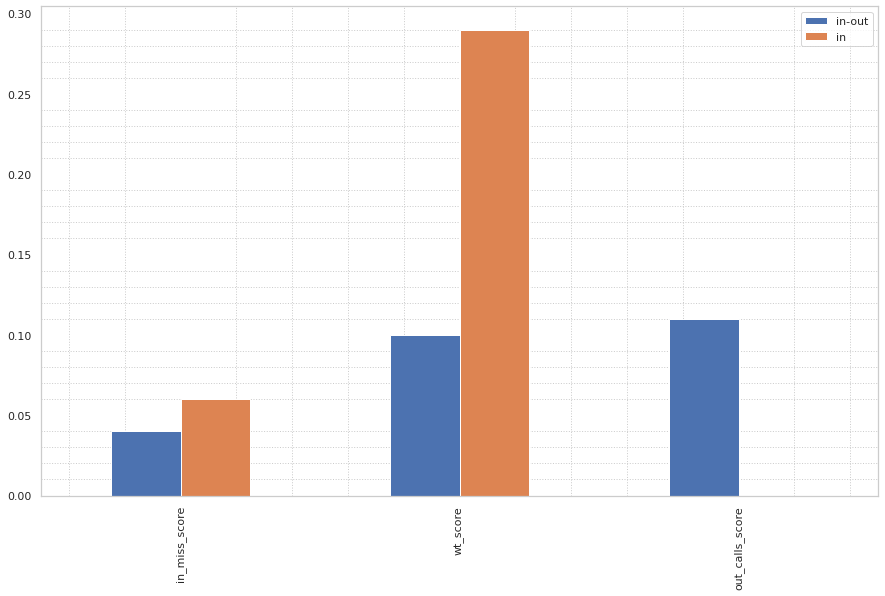

In [255]:
# сравним полученные оценки по группам КЦ 
# выделим операторов, которые получили оценку 1
sc_in = round(df[df['in_miss_score'] == 1]['center_group'].value_counts() / df['center_group'].value_counts(), 2)
sc_wt = round(df[df['wt_score'] == 1]['center_group'].value_counts() / df['center_group'].value_counts(), 2)
sc_wt1 = df[df['wt_score'] == 1]['center_group'].value_counts()
display(sc_wt1)
sc_out = round(df[df['out_calls_score'] == 1]['center_group'].value_counts() / df['center_group'].value_counts(), 2)

# построим датасет
data = [sc_in[0:], sc_wt[0:], sc_out[0:]]
mdf = pd.DataFrame(data).fillna(0)
mdf.index = ['in_miss_score','wt_score','out_calls_score']
display(mdf)

# визуализируем
mdf.plot(kind = 'bar',figsize = (15, 9))
plt.minorticks_on()
plt.grid(which = 'major')
plt.grid(which = 'minor', linestyle = ':')
plt.show()

In [256]:
# агрегируем данные по входящим, т.к. по ним больше всего операторов с высоким балом.
# определим среднюю оценку по операторам, отфильтруем по оценке, которые равны или больше 1 балла.
# определим среднюю оценку кц и отсортируем по убыванию
dfin = df.query("center_group == 'in'").groupby(['user_id', 'operator_id'])\
.agg({'wt_score':'count', 'total_score':'mean'}).sort_values(by = 'total_score', ascending = False).reset_index()
dfin = dfin.query("total_score >= 1")

dfin = dfin.groupby(['user_id'])\
.agg({'wt_score':'count', 'total_score':'mean'})\
.rename(columns = {'wt_score':'cnt', 'total_score':'mean'})\
.sort_values(by = 'mean', ascending = False).reset_index()
print(f'Колл-центры, которые будут заинтересованы услугами телеком провайдера: {dfin.user_id.count()}')
top_10 = dfin.head(10)

# визуализируем топ 10 клиентов, к которым стоит обратится в первую очередь
top_10['user_id'] = top_10['user_id'].astype('str')
fig = px.bar(top_10, x = 'user_id', y = 'mean', color = 'user_id')
fig.update_layout(
    title = 'топ-10 неэффективных Колл-центров',
    title_x = 0.5,
    xaxis_title = 'id колл-центра',
    yaxis_title = 'оценка'
)
fig.show()

Колл-центры, которые будут заинтересованы услугами телеком провайдера: 73


<b>Вывод:</b><br>
Больше всего Колл-центров, которые занимаются исходящими и входящими (221 в них 5640 операторов), входящих (86 в них 1230 операторов).<br>
По диаграмме видно, что больше всего операторов из группы входящих (703 - 29%).<br>
Получили 73 КЦ имеющие большую часть операторов, которых отнесли к неэффективным. Выгрузили топ_10 КЦ, к котором можно обратиться с предложением услуг телеком провайдера.

<a name = '3.'></a><font size = '4'><b>3. Проверка гипотез</b></font><br>
<font size = '2'>[Содержание](#0.0)</font>

<a name = "3.1."></a><font size = "3"><b>3.1 Наличие зависимости времени ожидания от тарифного плана</b></font><br/>
<font size = "2">[содержание](#0.0)</font>

Для проведения теста будем использовать <b>Критерий Краскела-Уоллиса kruskal()</b><br>
Крускал Уоллис тест позволяет определить значимость различий признака по нескольким группам(определяет наличие статистически значимой разницы между медианами). <br>
Будем использоват среднее время ожидания и выборку будем брать только по входящим вызовам<br>
<b>Alpha</b> = <b>0.05</b><br>
<b>Нулевая гипотеза:</b> Время ожидания от тарифного плана не зависит<br>
<b>Альтернативная гипотеза:</b> Время ожидания от тарифного плана зависит<br>

In [257]:
A = df.query("direction == 'in' & tariff_plan == 'A'")['avg_wait_time']
B = df.query("direction == 'in' & tariff_plan == 'B'")['avg_wait_time']
C = df.query("direction == 'in' & tariff_plan == 'C'")['avg_wait_time']

alpha = .05

results = kruskal(A, B, C)


print('p-значение =', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение = 4.3423470899037105e-09
Отвергаем нулевую гипотезу


<b>Вывод:</b>

<b>p-значение</b> = 4.3423470899037105e-09<br>
Отвергаем нулевую гипотезу и принимаем альтернативную: Время ожидания зависит от тарифного плана. Тест дал нам понять, что ожидание ответа имеет зависимость и возможно это связанно с какими-то особенностями конкретного тарифного плана.<br>
Предлагаю сравнить время ожидания по тарифным планам А, В, С.

<a name = "3.2."></a><font size = "3"><b>3.2 Время ожидания звонков с тарифами A, B, C различаются</b></font><br/>
<font size = "2">[содержание](#0.0)</font>

Для проведения теста будем использовать <b>t-test</b> Будем сравнивать средние двух генеральных совокупностей между собой.<br>
Для теста будем использовать столбец с  средним временем ожидания и тарифные планы.<br>
Будем использовать только входящие вызовы.<br>
Сравним тарифные планы А и В, В и С, А и С.<br>
<b>Alpha</b> = <b>0.05</b><br>
<b>Нулевая гипотеза:</b> Время ожидания звонков с тарифами не различаются<br>
<b>Альтернативная гипотеза:</b> Время ожидания звонков с тарифами различаются<br>

In [258]:
alpha = .05

results = stats.ttest_ind(A, B)

print('p - значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p - значение 4.0244352269479316e-05
Отвергаем нулевую гипотезу


In [259]:
alpha = .05

results = stats.ttest_ind(B, C)

print('p - значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p - значение 0.05116737754399189
Не получилось отвергнуть нулевую гипотезу


In [260]:
alpha = .05

results = stats.ttest_ind(A, C)

print('p - значение', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p - значение 2.731383703333934e-10
Отвергаем нулевую гипотезу


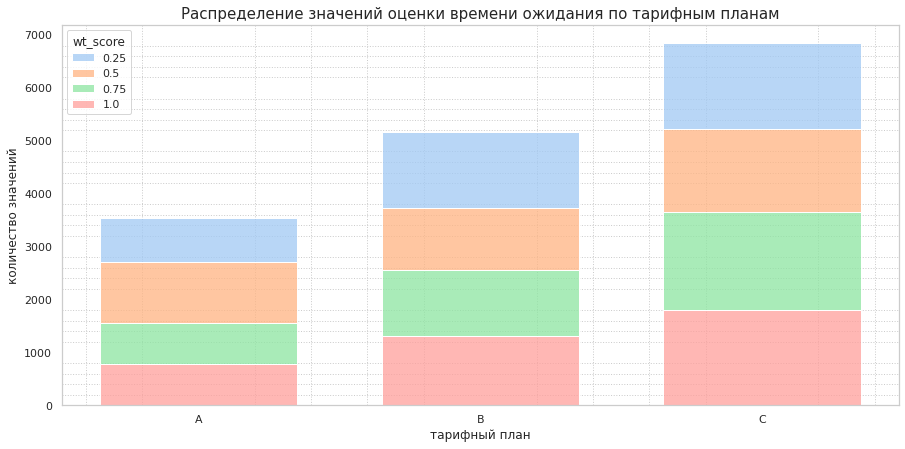

In [261]:
hist_tariff(df)

<b>Вывод:</b>

Сравнив время ожидания звонков с тарифными планами сделаем заключение, что тарифы А и В различаются, как и тарифы А и С, а вот тарифы В и С не отличаются. У клиентов с тарифом А по всей видимости не так много вопросов и операторы имеют возможность отвечать на звонки быстрее.

<a name = '4.'></a><font size = '4'><b>4. Выводы и рекомендации</b></font><br>
<font size = '2'>[Содержание](#0.0)</font>

<b>Цель проекта</b> определить неэффективных операторов<br>
* Определить наличие востребованности услуги для Колл-центров.
* Определить метод оценки деятельности операторов.


<b>Колл-центры занимаются:</b>
- распределением входящих звонков на операторов,
- совершением исходящих звонков силами операторов.

* Также операторы могут делать внутренние вызовы —  вызовы друг между другом внутри сети виртуальной телефонии.

Эффективность операторов определяется:
* Входящие:
    * количеством пропущенных звонков
    * долгим ожиданием ответа
* Исходящие:
    * количеством исходящих звонков

_________________

<b>Этапы выполнения проекта:</b>
* Ознакомились и провели корректировку данных
    Данные о звонках предоставлены за период с  2019-08-02 по 2019-11-28
    <b>Откорректировали:</b>
* типы данных:
    * `date` - datatime64
    * `internal` - bool
    * `operator_id` - int64
    * `date_start` - datatime64
* конечный размер представленной базы <i>35779</i>
* удалены пустые строки столбца `internal` - <b>110</b>
* восстановили `operator_id` - <b>7456</b>
* удалены дубликаты строк (4900)

<i>Примечание:</i> Отсутствует информация по идентификаторам операторов <b>17.87%</b> - это большая доля датасета. Удалять данные не будем, а восстановим случайными числами. Мы не будем знать за каким оператором закреплены данные, но зато необходимую информацию для анализа сохраним.<br>
<b>Стоит проинформировать заказчика.</b>

_________________

Входящих внутренних звонков <b>(671: 1.38%)</b><br>
Исходящих внутренних звонков <b>(4982: 10.18%)</b><br>
Естественно основной частью являются исходящие <b>(24015: 49.12%)</b> и входящие <b>(19224: 39.31%)</b> внешние звонки.

В день оператор совершает в среднем до <b>5</b> звонков, длительностью разговора <b>217</b> секунд и временем ожидания <b>79</b> секунд.<br>
В среднем 14 сек приходится на ожидание и 41 сек на длительность разговора.<br>
Датафрайм сократился до <b>35779</b> строк.<br>
Максимальные значения по всем параметрам стали более реальными: количество звонков - <b>63</b>, длительность звонка - <b>1950</b> сек, длительность звонков(с учетом времени ожидания) - <b>2020</b> сек, время ожидания - <b>528</b> сек.<br>

Но и при всем этом, даже если брать максимальные числа и 8 часовой рабочий день получается, а в день совершалось 5 звонков. Можно сделать вывод, что операторы не максимуме своих возможностей.<br>

__________________


Неэффективными будем считать операторов, у которых оценка будет <b>больше или равна 1</b><br>
Тем самым мы разделим операторов на рейтинговые группы, по которым Колл-центры смогут видеть производительность каждого оператора. При этом признаки можно добавлять или убирать, а метод оценки останется прежним.

* по входящим пропущенным будем смотреть как на внутренние, так и на внешние звонки
* по ожиданию ответа будем использовать среднее значение на один звонок
* по количеству исходящих звонков, при этом не будем учитывать пропущенные звонки

Разделили весь диапазон по квартилям:
* 0 будем присваивать значеям до 25%
* 1 будем присваивать значениям от 25% до 50%
* 2 будем присваивать значениям от 50% до 75%
* 3 будем присваивать значениям от 75%


Разделили операторов на рейтинговые группы, которые позволяют видеть производительность каждого сотрудника. Также возможно менять признаки для оценки дейтельности сотрудников.<br>
В входящих пропущенных звонках границы квантилей получили одно значение, поэтому оценку пришлось установить отличной от оценки двух других признаков.<br>
В результате получили по исходящим показатели выше, чем по входящим из-за разницы оценки.

Наблюдается небольшая положительная связь <b>(0.4)</b> времени ожидания с пропущенными входящими, а также исходящих непропущенных звонков с длительностью вызова <b>(0.6)</b>.<br>
По распределению по тарифам времени ожидания видно, что тарифы <b>А, B, C</b> имею различия в динамике и это заметно по всем оценкам.<br>

Больше всего Колл-центров, которые занимаются исходящими и входящими (221 в них 5640 операторов), входящих (86 в них 1230 операторов).<br>
По диаграмме видно, что больше всего операторов из группы входящих (703 - 29%).<br>
Получили 73 КЦ имеющие большую часть операторов, которых отнесли к неэффективным. Выгрузили топ_10 КЦ, к котором можно обратиться с предложением услуг телеком провайдера.


_________________


<b>Гипотезы:</b>
* Время ожидания звонков с тарифами различаются

Для проведения теста использовали <b>Критерий Краскела-Уоллиса kruskal()</b><br>
Крускал Уоллис тест позволяет определить значимость различий признака по нескольким группам(определяет наличие статистически значимой разницы между медианами). <br>
Использовали среднее время ожидания и выборку по входящим вызовам<br>

<b>Alpha</b> = <b>0.05</b><br>
<b>Нулевая гипотеза:</b> Время ожидания от тарифного плана не зависит<br>
<b>Альтернативная гипотеза:</b> Время ожидания от тарифного плана зависит<br>
_________
<b>p-значение</b> = 4.3423470899037105e-09<br>
Отвергаем нулевую гипотезу и принимаем альтернативную: Время ожидания зависит от тарифного плана. Тест дал нам понять, что ожидание ответа имеет зависимость и возможно это связанно с какими-то особенностями конкретного тарифного плана.<br>
Предлагаю сравнить время ожидания по тарифным планам А, В, С.

<br>
<br>

* Время ожидания звонков с тарифами A, B, C различаются

Для проведения теста использовали <b>t-test</b> Сравнения средних двух генеральных совокупностей между собой.<br>
Использовали среднее время ожидания и тарифные планы А и В, В и С, А и С..<br>
Использовали входящие вызовы.<br>

<b>Alpha</b> = <b>0.05</b><br>
<b>Нулевая гипотеза:</b> Время ожидания звонков с тарифами не различаются<br>
<b>Альтернативная гипотеза:</b> Время ожидания звонков с тарифами различаются<br>
_________
Сравнив время ожидания звонков с тарифными планами сделаем заключение, что тарифы А и В различаются(p - значение 4.0244352269479316e-05), как и тарифы А и С(p - значение 0.05116737754399189), а вот тарифы В и С(p - значение 2.731383703333934e-10) не отличаются. У клиентов с тарифом А по всей видимости не так много вопросов и операторы имеют возможность отвечать на звонки быстрее.


</b>Заключение:</b><br>
Считаю задачу мы выполнили метод обозначен, выделены возможные клиенты, есть гипкость условий оценки. Необходимо делать выгрузку за каждый месяц и проводить более детальный анализ, чтобы выстроить конкретную стратегию улучшения качества работы.<br>
Опираяся на полученные данные можно утверждать, что развивать систему эффективности однозначно стоит. Изуть более детально информацию по звонкам операторов, мы вывели только часть КЦ(73), которые требуют вмешательства производительности.


<b>Ссылка на презентацию:</b>  https://disk.yandex.ru/d/9dFX66O2t2f3ug